# Vector Fields and Other Plots for my BSc Thesis

__Author:__ Mathieu Kaltschmidt 

In [38]:
#Important libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import animation

#Plot settings
plt.style.use('fast')
plt.rcParams["font.family"]='serif'

plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

## I. Phase Space Plot for the Einstein-Hilbert Truncation (without matter)

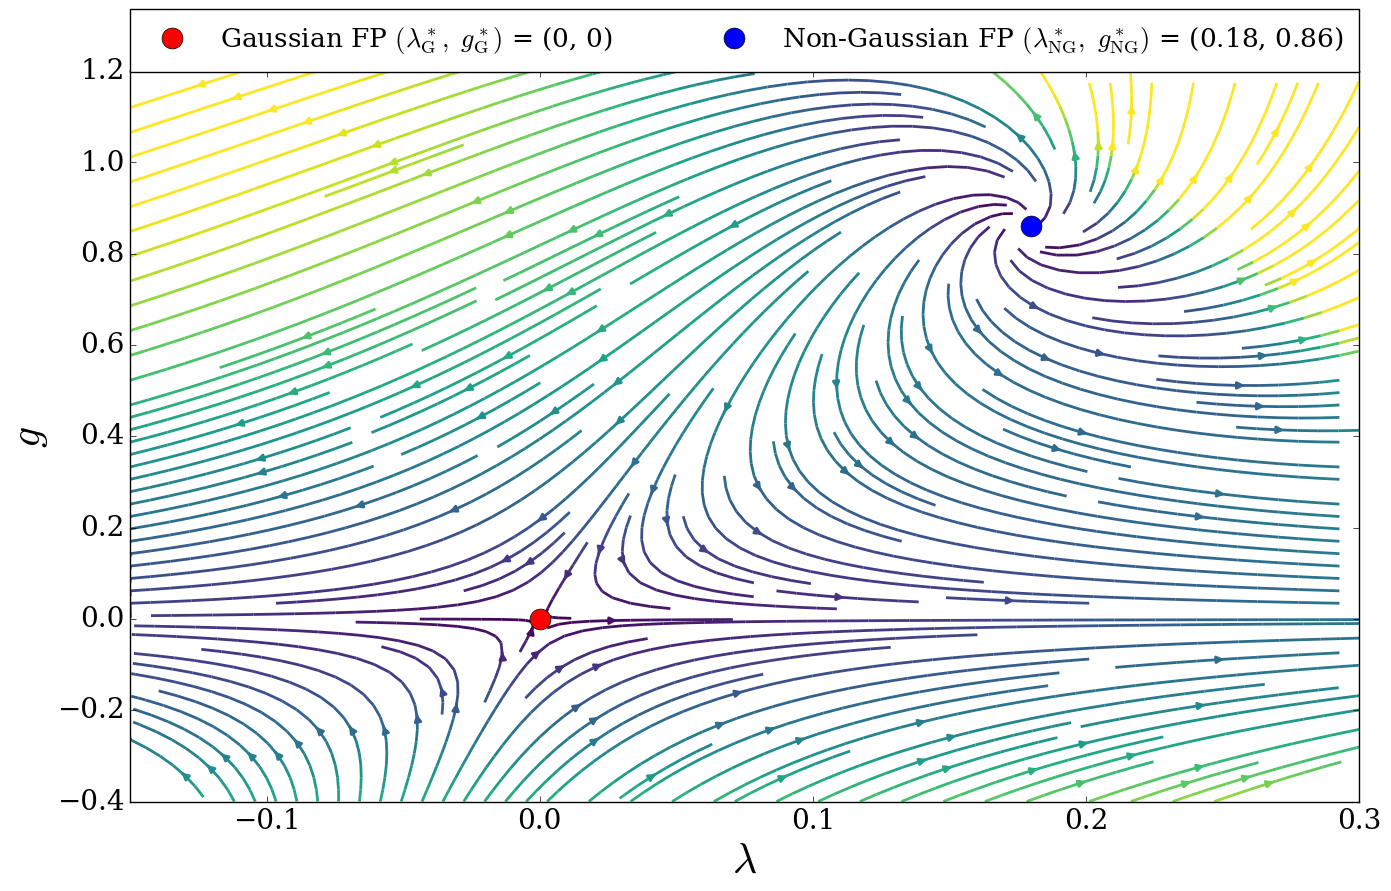

In [40]:
#Range of couplings we are interested in 
g = np.linspace(-0.4,1.2,1000)
lam = np.linspace(-0.15,0.3,1000)

#Stucture of Phase Space as meshgrid
Lam, G = np.meshgrid(lam, g)

#Anomalous Dimension for the Newton Coupling
eta_g = (-(5*G/(3*np.pi*(1-2*Lam)**2)) - (5*G/(6*np.pi*(1-2*Lam))) ) / (1 - (5*G/(18*np.pi*(1-2*Lam)**2)) - (5*G/(24*np.pi*(1-2*Lam))))

#Beta Functions
dt_g = (2 + eta_g)*G
dt_lam = -4*Lam + (Lam/G)*dt_g + (5/(4*np.pi))*G*((1-(eta_g/6))/(1-2*Lam))

#Color profile
speed = np.clip(np.sqrt(dt_lam**2 + dt_g**2), 0,1.5)

#Phase Space           
plt.streamplot(Lam, G, -dt_lam, -dt_g, density=2, linewidth = 2, color = speed, cmap= "viridis")

#Fixed Points
plt.plot(0,0, marker='o', markersize=15, color="red", label = r"Gaussian FP $(\lambda^*_{\mathrm{G}}, \ g^*_{\mathrm{G}})$ = (0, 0)", ls='')
plt.plot(0.18,0.86, marker='o', markersize=15, color="blue", label = r"Non-Gaussian FP $(\lambda^*_{\mathrm{NG}}, \ g^*_{\mathrm{NG}})$ = (0.18, 0.86)", ls='')

plt.xlabel(r"$\lambda$",size = 30)
plt.xticks(fontsize=20)
plt.ylabel(r"$g$",size = 30)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(0., 1.012, 1.0, 0.06), loc='center',
           ncol=2, mode="expand", borderpad=0.6, borderaxespad=0., numpoints=1, fontsize=19)

#Saving figure
plt.tight_layout()
plt.savefig('Plots/EH_NoMatter.png', format='png')

## II. Gravity-Matter systems 

In [3]:
#Ranges for matter content
Nscalars = np.linspace(0,39,40)
Nfermions = np.linspace(0,39,40)
Ngauge = np.linspace(0,39,40)

#Initialization without matter
N_S = Nscalars[0] 
N_D = Nfermions[0]
N_V = Ngauge[0]

#Beta functions from Paper (will be computed by myself later on)
def dt_G(G, N_S, N_D, N_V):
    return 2*G + G**2/(6*np.pi)*(N_S + 2*N_D - 4*N_V - 46)

def dt_Lam(G,Lam, N_S, N_D, N_V):
    return -2*Lam +  G/(4*np.pi)*(N_S - 4*N_D + 2*N_V + 2) + (G*Lam)/(6*np.pi)*(N_S + 2*N_D- 4*N_V - 16)

In [80]:
#Fixed Points as function of matter fields from perturbative approximation
def Lam_star(N_S, N_D, N_V):
    return -(3/4)*(N_S - 4*N_D + N_V + 2)/(N_S  -(5/2)*N_D -4*N_V -27)
def G_star(N_S, N_D, N_V):
    return -(12*np.pi)/(N_S  -(5/2)*N_D - 4*N_V - 27) 

### Scalar fields

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


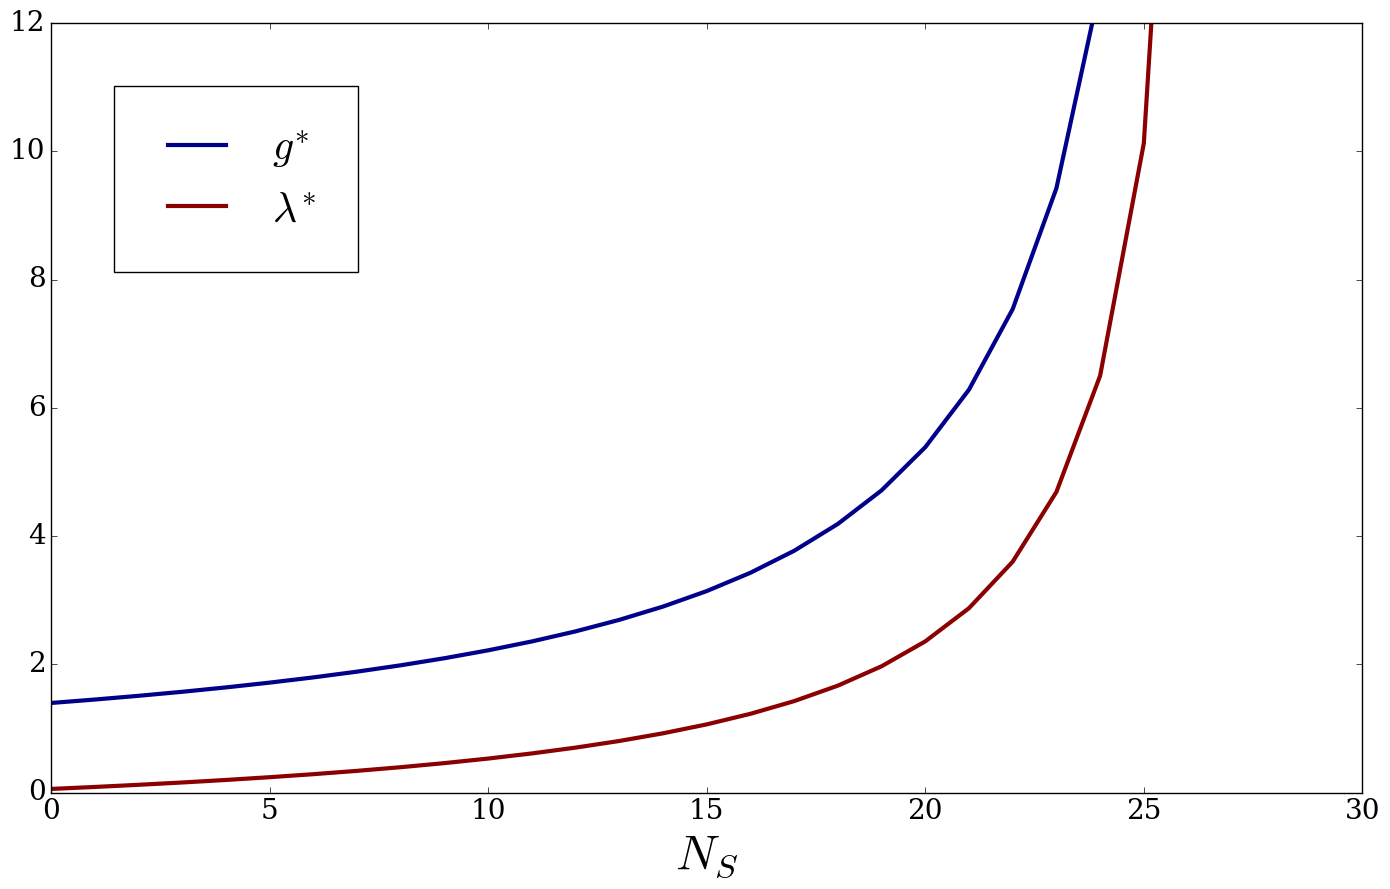

In [95]:
#Impact on fixed point values
plt.plot(Nscalars, G_star(Nscalars, 0, 0), linewidth=3, color="darkblue", label=r"$g^{*}$")
plt.plot(Nscalars, Lam_star(Nscalars, 0, 0),linewidth=3, color="darkred", label=r"$\lambda^{*}$")

plt.ylim(0,12)
plt.xlim(0,30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r"$N_S$", size =35)

plt.legend(frameon=True, fontsize=30, borderpad=1, borderaxespad=1.5,loc='upper left')


#Saving figure
plt.tight_layout()
plt.savefig('Plots/FP_scalars.png', format='png')

In [41]:
#Range of couplings we are interested in 
g = np.linspace(-0.5,1.5,100)
lam = np.linspace(-0.5,1.5,100)

plt.plot(g, dt_G(g, Nscalars,N_D,N_V))

ValueError: operands could not be broadcast together with shapes (100,) (40,) 

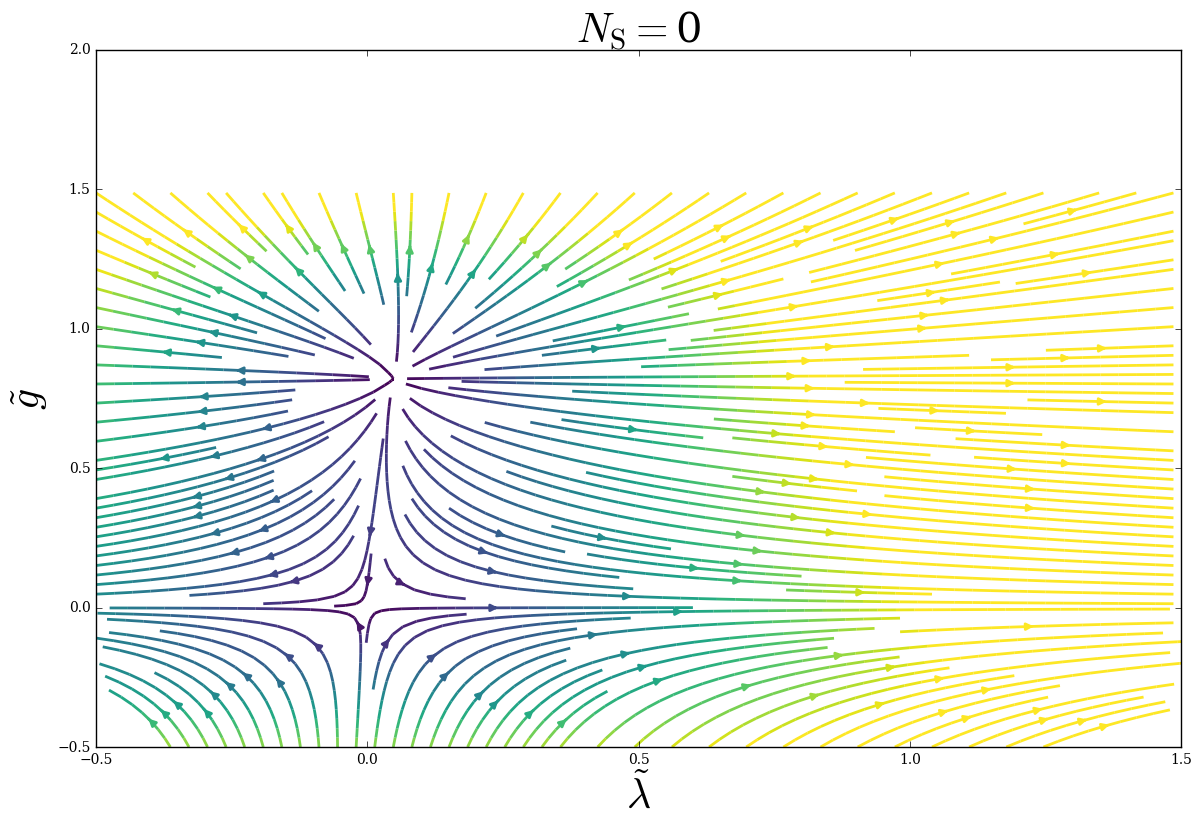

In [16]:
#Range of couplings we are interested in 
g = np.linspace(-0.5,1.5,100)
lam = np.linspace(-0.5,1.5,100)

#Stucture of Phase Space as meshgrid
Lam, G = np.meshgrid(lam, g)

beta_lam = dt_Lam(G,Lam, Nscalars[0], N_D, N_V)
beta_g = dt_G(G, Nscalars[0], N_D, N_V)
speed = np.clip(np.sqrt(dt_Lam(G, Lam, Nscalars[0], N_D, N_V)**2 + dt_G(G, Nscalars[0], N_D, N_V)**2), 0,2)

fig, ax = plt.subplots()
stream = ax.streamplot(Lam, G, -1*beta_lam, -1*beta_g, density=2, linewidth = 2, color = speed, cmap= "viridis")
ax.set_xlabel(r"$\tilde{\lambda}$",size = 30)
ax.set_ylabel(r"$\tilde{g}$",size = 30)


def animate(iter):
    #assign current beta function to matter content
    ax.collections = [] # clear lines streamplot
    ax.patches = [] # clear arrowheads streamplot
    ax.set_title(r"$N_{\mathrm{S}} = $" + "{}".format(int((Nscalars[iter]))), size = 30)

    beta_lam = dt_Lam(G,Lam, Nscalars[iter], N_D, N_V)
    beta_g = dt_G(G, Nscalars[iter], N_D, N_V)
    speed = np.clip(np.sqrt(dt_Lam(G, Lam, Nscalars[iter], N_D, N_V)**2 + dt_G(G, Nscalars[iter], N_D, N_V)**2), 0,2)

    stream = ax.streamplot(Lam, G, -1*beta_lam, -1*beta_g, density=2, linewidth = 2, color = speed, cmap= "viridis")
    return stream

anim = animation.FuncAnimation(fig, animate,
                               frames=40, # t-values and steps
                               interval=1000, # wait time before displaying new frame in ms
                               blit=False)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=-1)

anim.save('Animations/scalars.mp4', writer=writer)

### Fermions

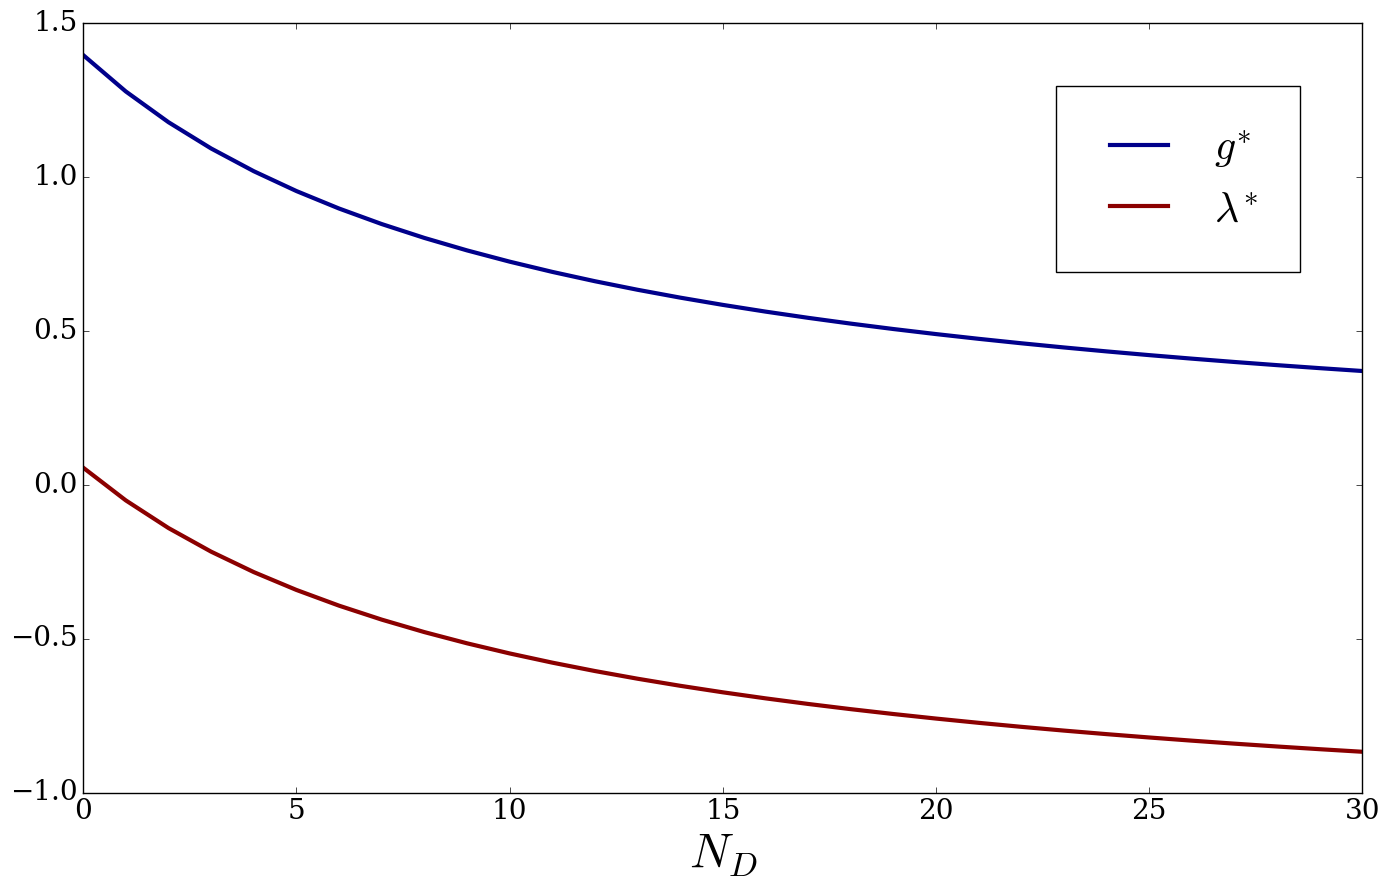

In [100]:
#Impact on fixed point values
plt.plot(Nfermions, G_star(0, Nfermions, 0), linewidth=3, color="darkblue", label=r"$g^{*}$")
plt.plot(Nfermions, Lam_star(0, Nfermions, 0),linewidth=3, color="darkred", label=r"$\lambda^{*}$")

#plt.ylim(-4,4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,30)
plt.xlabel(r"$N_D$", size =35)

plt.legend(frameon=True, fontsize=30, borderpad=1, borderaxespad=1.5,loc='best')


#Saving figure
plt.tight_layout()
plt.savefig('Plots/FP_fermions.png', format='png')

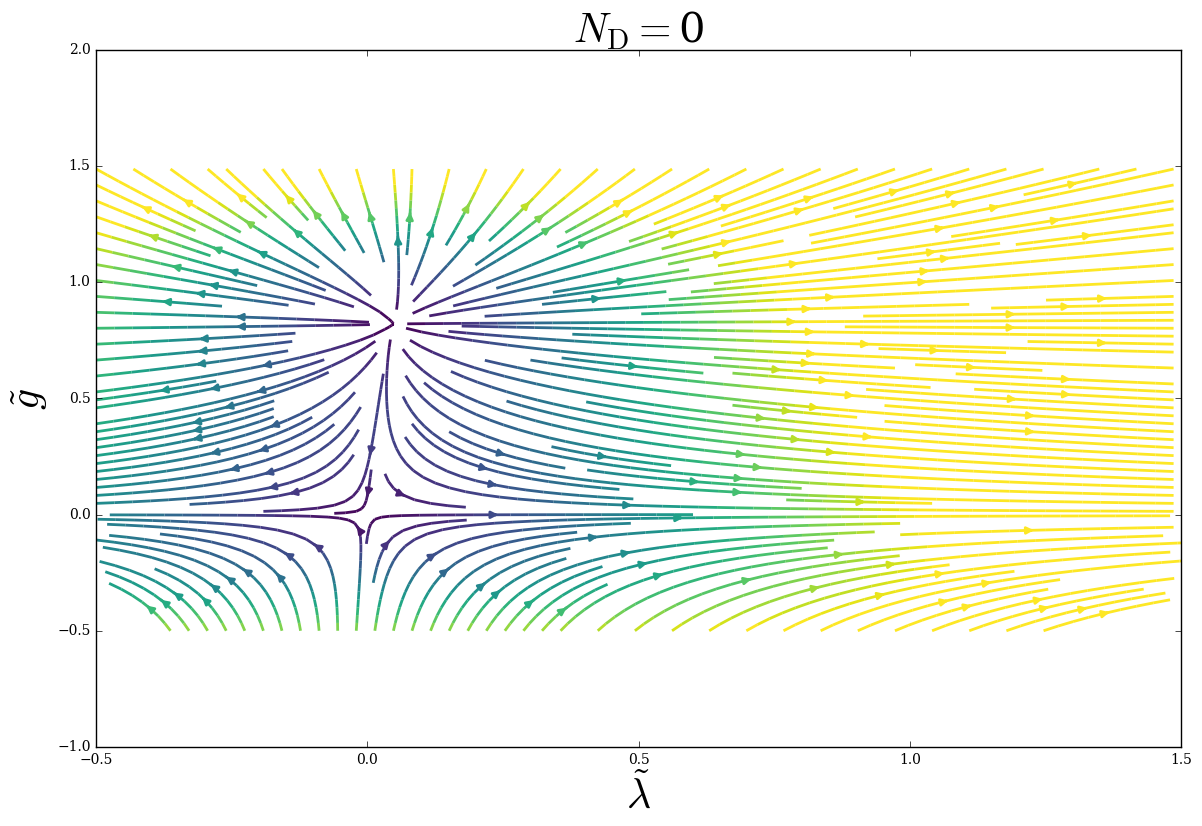

In [17]:
#Range of couplings we are interested in 
g = np.linspace(-0.5,1.5,100)
lam = np.linspace(-0.5,1.5,100)

#Stucture of Phase Space as meshgrid
Lam, G = np.meshgrid(lam, g)

beta_lam = dt_Lam(G,Lam, N_S, Nfermions[0], N_V)
beta_g = dt_G(G, N_S, Nfermions[0], N_V)
speed = np.clip(np.sqrt(dt_Lam(G, Lam, N_S, Nfermions[0], N_V)**2 + dt_G(G, N_S, Nfermions[0], N_V)**2), 0,2)

fig, ax = plt.subplots()
stream = ax.streamplot(Lam, G, -1*beta_lam, -1*beta_g, density=2, linewidth = 2, color = speed, cmap= "viridis")
ax.set_xlabel(r"$\tilde{\lambda}$",size = 30)
ax.set_ylabel(r"$\tilde{g}$",size = 30)


def animate(iter):
    #assign current beta function to matter content
    ax.collections = [] # clear lines streamplot
    ax.patches = [] # clear arrowheads streamplot
    ax.set_title(r"$N_{\mathrm{D}} = $" + "{}".format(int((Nfermions[iter]))), size = 30)

    beta_lam = dt_Lam(G,Lam, N_S, Nfermions[iter], N_V)
    beta_g = dt_G(G, N_S, Nfermions[iter], N_V)
    speed = np.clip(np.sqrt(dt_Lam(G, Lam, N_S, Nfermions[iter], N_V)**2 + dt_G(G, N_S, Nfermions[iter], N_V)**2), 0,2)

    stream = ax.streamplot(Lam, G, -1*beta_lam, -1*beta_g, density=2, linewidth = 2, color = speed, cmap= "viridis")
    return stream

anim = animation.FuncAnimation(fig, animate,
                               frames=40, # t-values and steps
                               interval=1000, # wait time before displaying new frame in ms
                               blit=False)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=-1)

anim.save('Animations/fermions.mp4', writer=writer)

### Gauge Fields

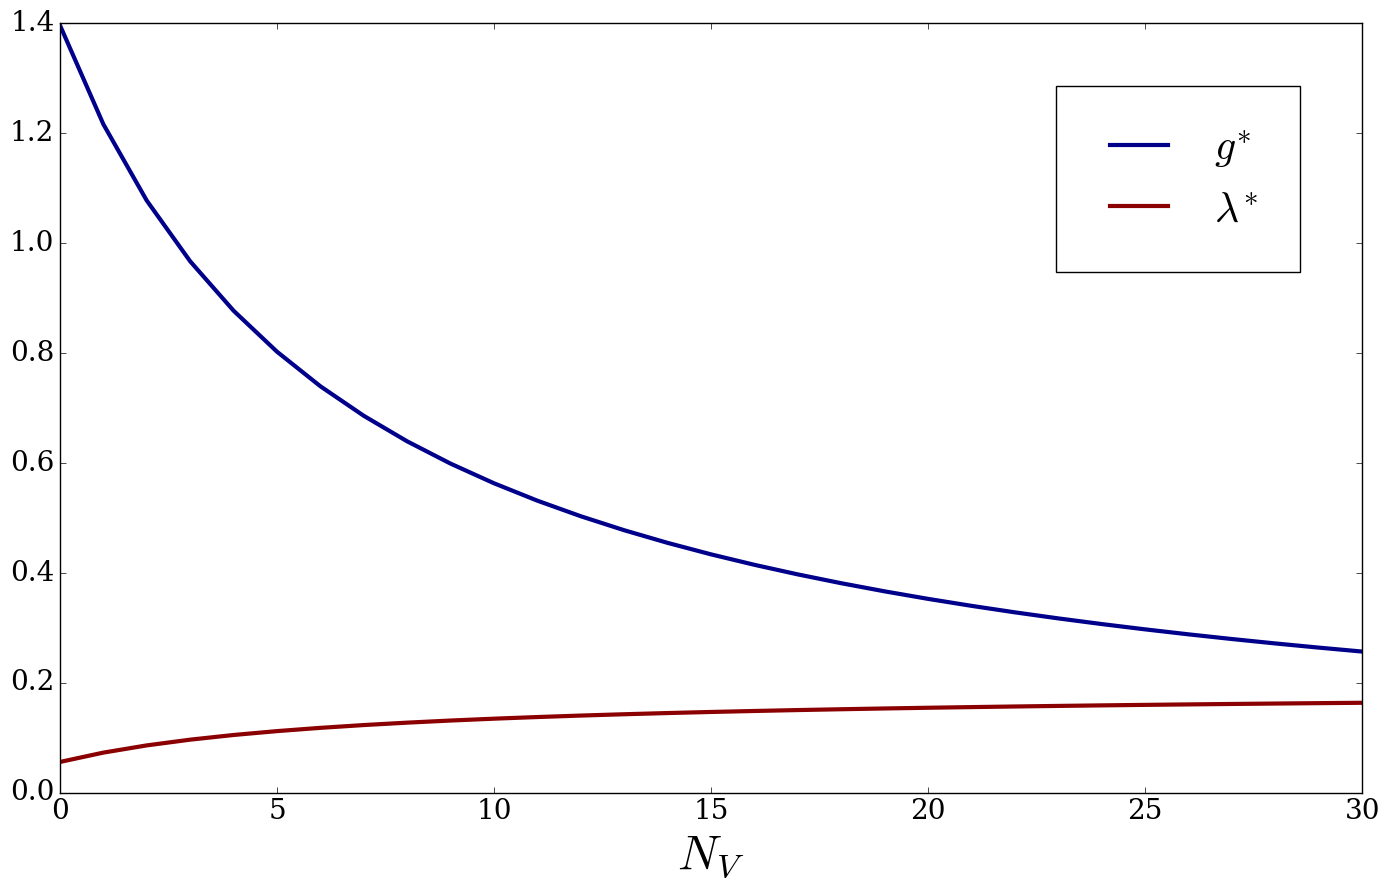

In [98]:
#Impact on fixed point values
plt.plot(Ngauge, G_star(0, 0, Ngauge), linewidth=3, color="darkblue", label=r"$g^{*}$")
plt.plot(Ngauge, Lam_star(0, 0, Ngauge),linewidth=3, color="darkred", label=r"$\lambda^{*}$")

#plt.ylim(-0.5,1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,30)
plt.xlabel(r"$N_V$", size =35)

plt.legend(frameon=True, fontsize=30, borderpad=1, borderaxespad=1.5,loc='best')


#Saving figure
plt.tight_layout()
plt.savefig('Plots/FP_gauge.png', format='png')

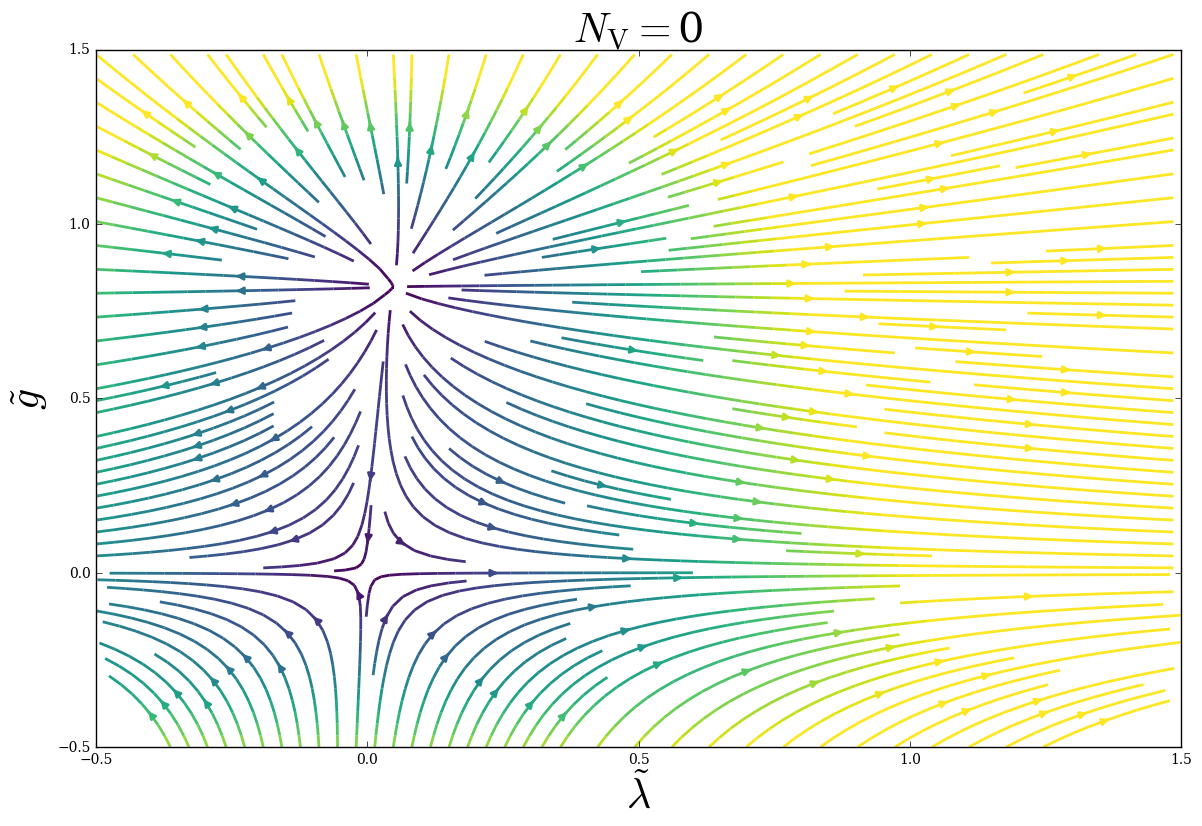

In [18]:
#Range of couplings we are interested in 
g = np.linspace(-0.5,1.5,100)
lam = np.linspace(-0.5,1.5,100)

#Stucture of Phase Space as meshgrid
Lam, G = np.meshgrid(lam, g)

beta_lam = dt_Lam(G,Lam, N_S, N_D, Ngauge[0])
beta_g = dt_G(G, N_S, N_D, Ngauge[0])
speed = np.clip(np.sqrt(dt_Lam(G, Lam, N_S, N_D, Ngauge[0])**2 + dt_G(G, N_S, N_D, Ngauge[0])**2), 0,2)

fig, ax = plt.subplots()
stream = ax.streamplot(Lam, G, -1*beta_lam, -1*beta_g, density=2, linewidth = 2, color = speed, cmap= "viridis")
ax.set_xlabel(r"$\tilde{\lambda}$",size = 30)
ax.set_ylabel(r"$\tilde{g}$",size = 30)


def animate(iter):
    #assign current beta function to matter content
    ax.collections = [] # clear lines streamplot
    ax.patches = [] # clear arrowheads streamplot
    ax.set_title(r"$N_{\mathrm{V}} = $" + "{}".format(int((Ngauge[iter]))), size = 30)

    beta_lam = dt_Lam(G,Lam, N_S, N_D, Ngauge[iter])
    beta_g = dt_G(G, N_S, N_D, Ngauge[iter])
    speed = np.clip(np.sqrt(dt_Lam(G, Lam, N_S, N_D, Ngauge[iter])**2 + dt_G(G, N_S, N_D, Ngauge[iter])**2), 0,2)

    stream = ax.streamplot(Lam, G, -1*beta_lam, -1*beta_g, density=2, linewidth = 2, color = speed, cmap= "viridis")
    return stream

anim = animation.FuncAnimation(fig, animate,
                               frames=40, #steps
                               interval=1000, # wait time before displaying new frame in ms
                               blit=False)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=-1)

anim.save('Animations/gauge_fields.mp4', writer=writer)

### Mixed Systems

In [6]:
#Fixed Points as function of matter fields from perturbative approximation
def Lam_star(N_S, N_D, N_V):
    return -(3/4)*(N_S - 4*N_D + 2*N_V + 2)/(N_S + 2*N_D -4*N_V -31)
def G_star(N_S, N_D, N_V):
    return -(12*np.pi)/(N_S + 2*N_D - 4*N_V - 46)